# Clase 8

## PCA

In [4]:
from xml.etree.ElementInclude import include
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines', 'Proline']
df_wine.head(10)
#df_wine['Class label'] = df_wine['Class label'].astype('category')
#df_wine.describe(include = 'all')
#df_wine['Class label'].value_counts()

In [5]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Matriz de covarianza

In [7]:
import numpy as np
#Matriz de covarianza con matriz transpuesta 
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nValores Propios: \n%s' % eigen_vals)


Valores Propios: 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

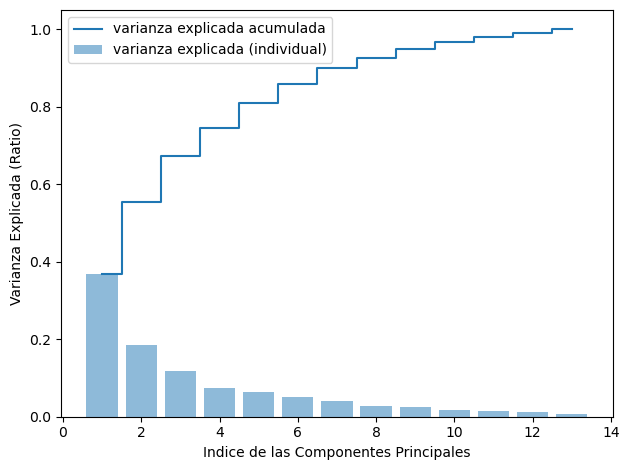

In [9]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
label='varianza explicada (individual)')
plt.step(range(1, 14), cum_var_exp, where='mid',
label='varianza explicada acumulada')
plt.ylabel('Varianza Explicada (Ratio)')
plt.xlabel('Indice de las Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
# plt.savef

### Transformaión de características

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matriz W:\n', w)
print('Dim W:\n', w.shape)

Matriz W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]
Dim W:
 (13, 2)


In [11]:
X_train_std[0].dot(w)
X_train_std[15].dot(w)

array([2.85996853, 2.28819559])

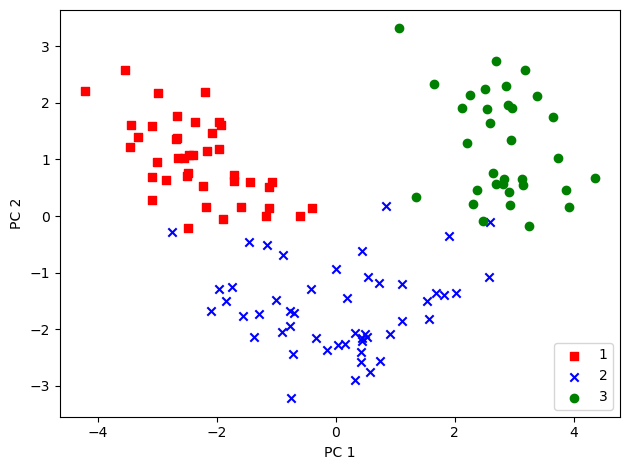

In [12]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],X_train_pca[y_train == l, 1],c=c,label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

### PCA sklearn

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_



array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

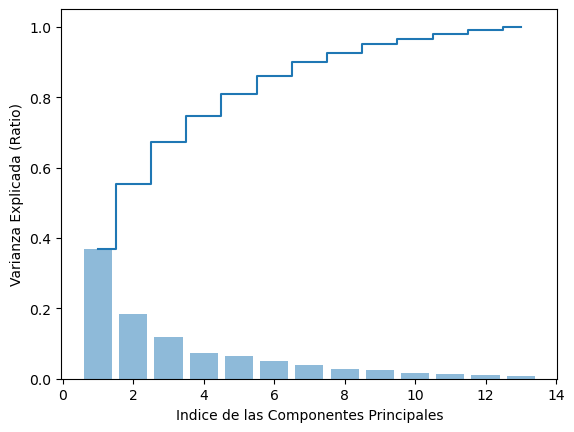

In [15]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Varianza Explicada (Ratio)')
plt.xlabel('Indice de las Componentes Principales')
plt.show()

In [18]:
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[-3.02018404e-01,  7.81895450e-01, -1.71410478e-01,
        -3.23153045e-03, -2.66625736e-01, -2.43366965e-01,
        -5.69117802e-02,  2.16725465e-01, -2.22926311e-01,
        -1.73135111e-01, -1.11777607e-01,  5.01053166e-02,
         3.09863159e-02],
       [ 5.44089424e-01,  2.56268630e-01,  1.19646716e-01,
         5.51624618e-01,  8.21439376e-02, -5.10202452e-01,
         1.97259514e-01,  7.40373561e-03,  6.18109097e-02,
         6.35004393e-02,  1.13451054e-01, -3.16072748e-02,
        -8.64628855e-03],
       [-5.60093818e-02,  3.80140862e-01,  8.43404129e-01,
        -1.06842283e-01, -1.47553427e-01, -3.16623058e-04,
        -9.52655986e-02, -1.04530631e-01,  2.14039991e-01,
        -2.13315368e-01,  4.91376938e-02, -6.58189138e-03,
        -4.68130063e-02],
       [ 4.55408287e-01, -1.76464625e-01,  7.77782099e-01,
         3.31562024e-02,  4.73273183e-02,  3.30218077e-02,
        -1.61261417e-01,  2.59352653e-01, -1.36188668e-01,
         1.93614837e-01, -8.48358888e

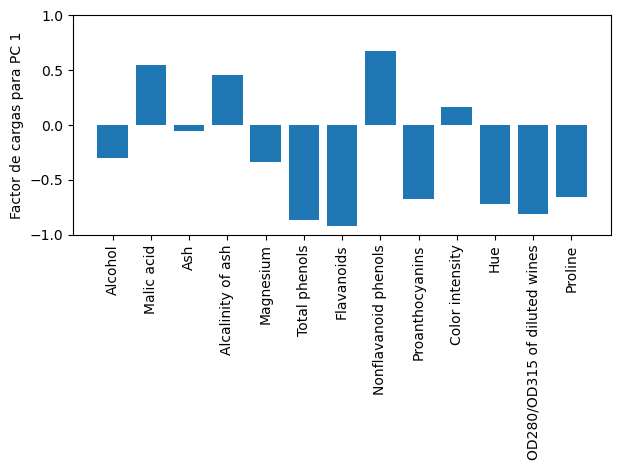

In [19]:
factor_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), factor_loadings[:, 0], align='center')
ax.set_ylabel('Factor de cargas para PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

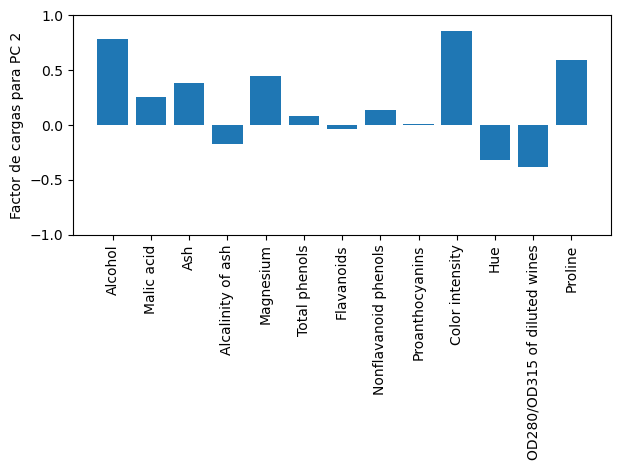

In [20]:
fig, ax = plt.subplots()
ax.bar(range(13), factor_loadings[:, 1], align='center')
ax.set_ylabel('Factor de cargas para PC 2')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

## Análisis de discriminante lineal

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [17]:
print(X_train_lda[:10,:])
print(X_train_lda.shape)

[[-2.96463525  1.15696578]
 [ 3.35009835  2.07089788]
 [ 3.06163017  1.09368358]
 [ 2.7329816   1.49363859]
 [-3.54607454  0.99220553]
 [ 0.01652658 -2.95671405]
 [-0.26521753 -3.71080577]
 [-3.35455379  0.14185328]
 [-0.82788767 -1.91824846]
 [-1.47271886 -3.92230732]]
(124, 2)


Actividad

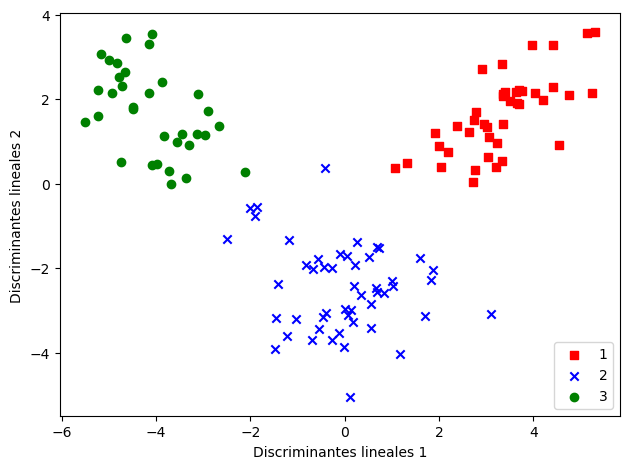

In [26]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],X_train_lda[y_train == l, 1],c=c,label=l, marker=m)
plt.xlabel('Discriminantes lineales 1')
plt.ylabel('Discriminantes lineales 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

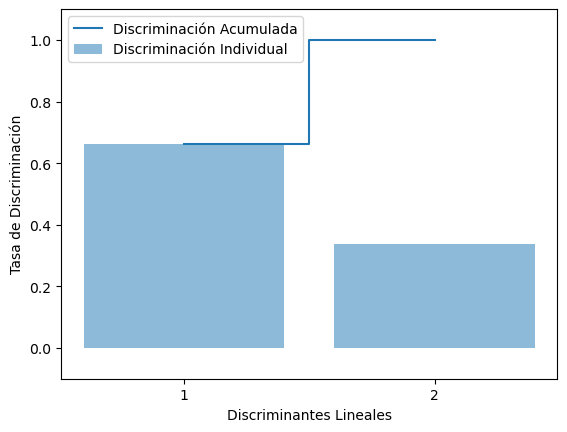

In [21]:
plt.bar(range(1,3), lda.explained_variance_ratio_, alpha=0.5,
align='center',label='Discriminación Individual',tick_label=[1,2])
plt.step(range(1,3), np.cumsum(lda.explained_variance_ratio_), where='mid',
label='Discriminación Acumulada')
plt.ylabel('Tasa de Discriminación')
plt.xlabel('Discriminantes Lineales')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

Visualizacion y reduccion de dimensionalidad no lineal

4.1 t-SNE

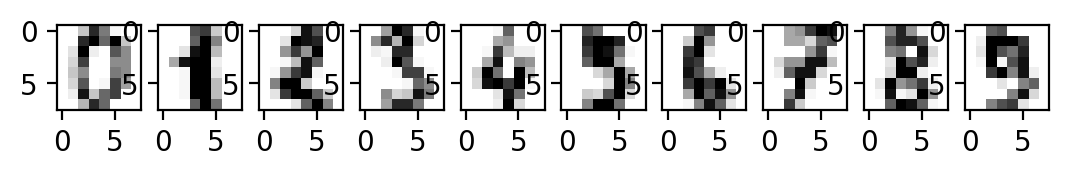

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(1, 10,dpi=200)
for i in range(10):
    ax[i].imshow(digits.images[i], cmap='Greys')
# plt.savefig('figures/05_12.png', dpi=300)
plt.show()

In [29]:
digits.data.shape

(1797, 64)

In [30]:
y_digits = digits.target
X_digits = digits.data

4.2 t-SNE con Scikit-Learn

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,init='pca',random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


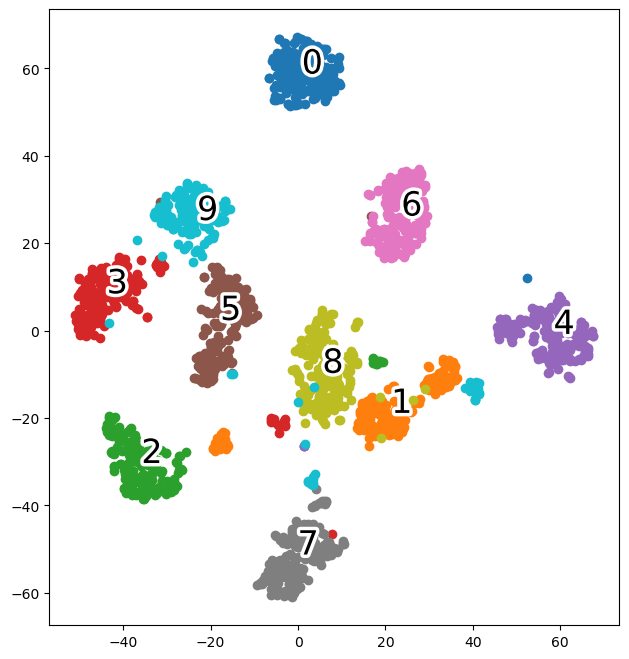

In [32]:
import matplotlib.patheffects as PathEffects

def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5,foreground="w"),PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

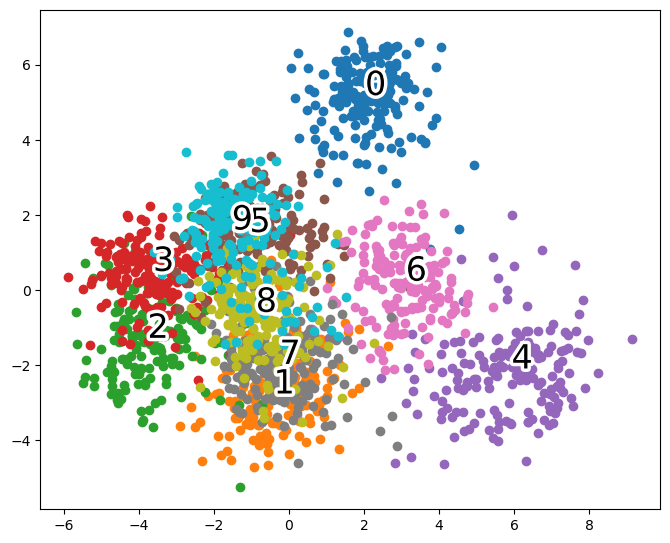

In [33]:
lda = LDA(n_components=2)
X_digits_lda = lda.fit_transform(X_digits, y_digits)
plot_projection(X_digits_lda, y_digits)
plt.show()

4.2 t-SNE con Scikit-Learn

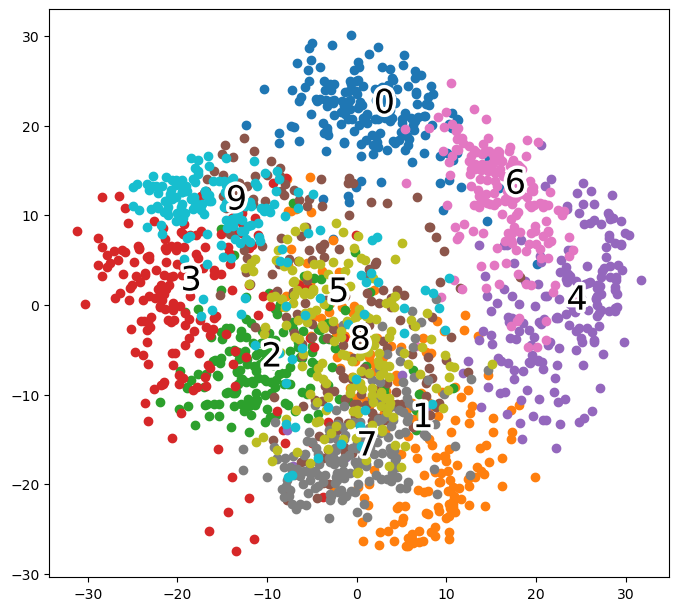

In [34]:
pca = PCA(n_components=2)
X_digits_pca = pca.fit_transform(X_digits, y_digits)
plot_projection(X_digits_pca, y_digits)
plt.show()

## ---------------------------------------
                    NO VISTO EN CLASES 1-2023

## KPCA

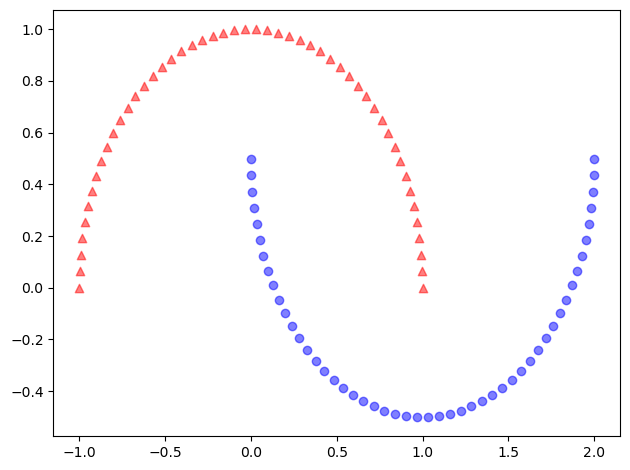

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

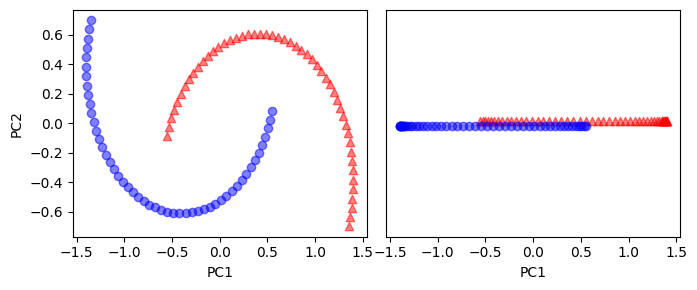

In [30]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

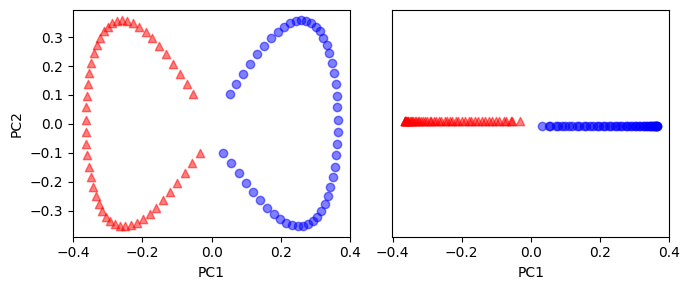

In [31]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = scikit_kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

## Tarea : 
### Comparar PCA y KPCA en el siguiente conjunto de datos

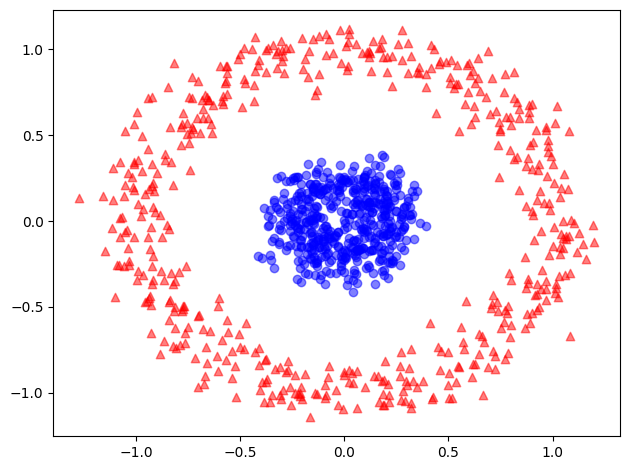

In [32]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
# plt.savefig('images/05_15.png', dpi=300)
plt.show()

#### PCA